In [316]:
import os
import ast
import pickle
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.rc('font', family='AppleGothic')

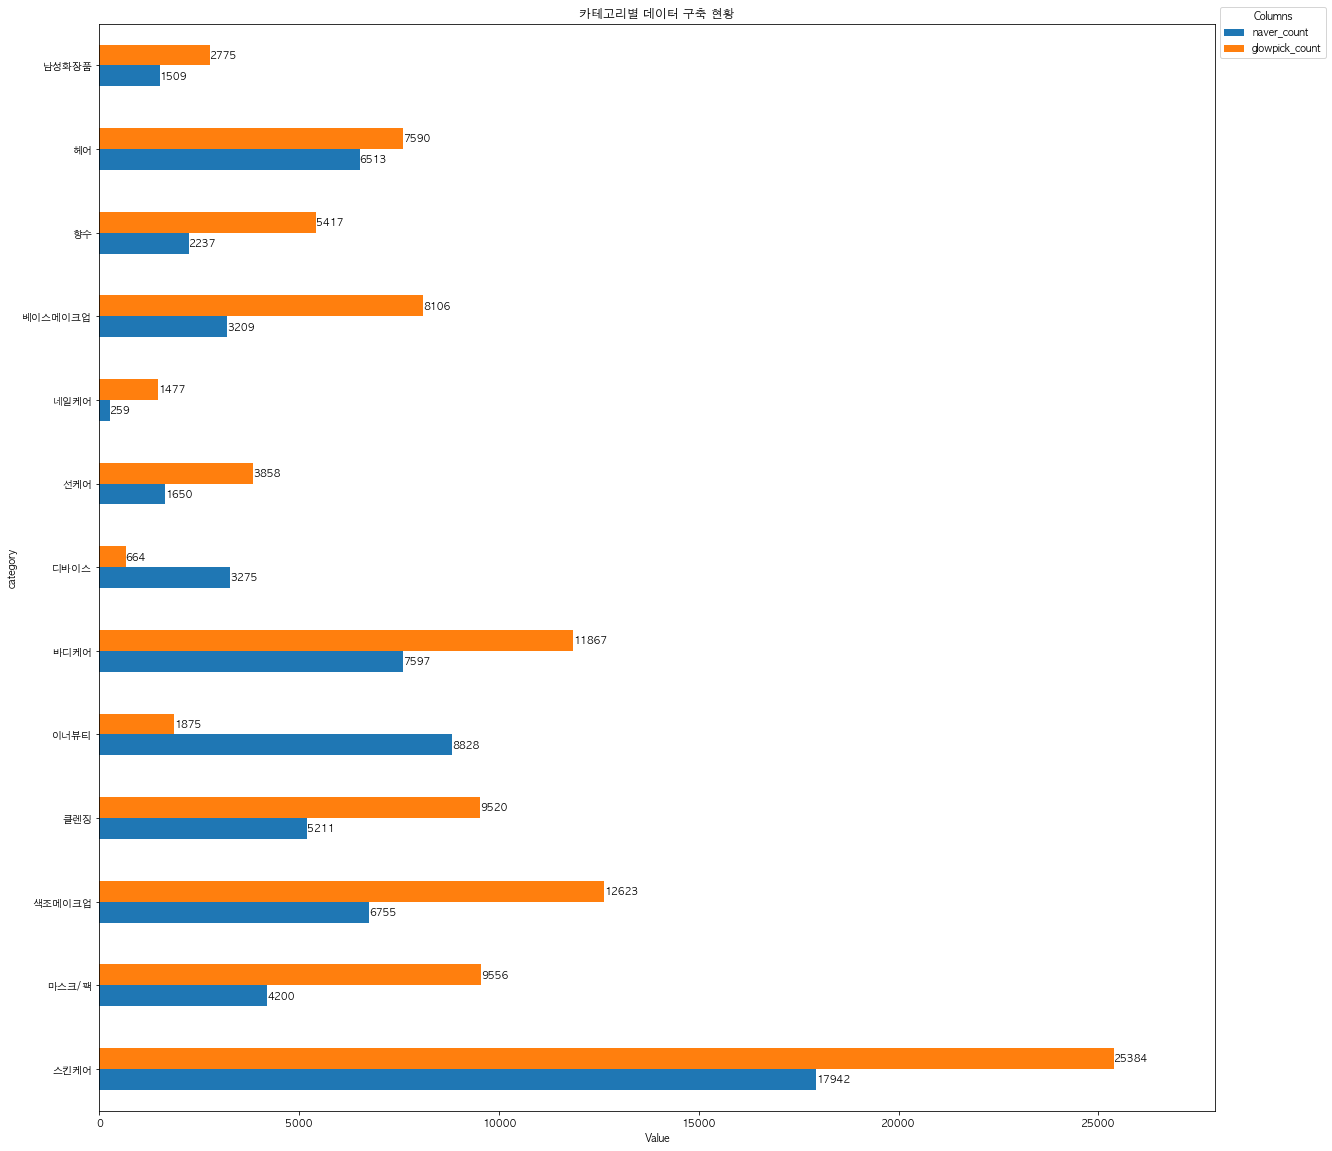

In [389]:
with open('count.txt', 'rb') as f:
    product_count = pickle.load(f)
    
dfg = product_count.copy()
dfg['category'] = list(dfg.index)
dfg = dfg.loc[:, ['category', 'product_count', 'review_count']]; fl_dfg = dfg.reset_index(drop=True)

d1 = {'스킨케어': 4290854, '베이스메이크업': 1164705, '색조메이크업': 2613519}
d2 = {'마스크/팩': 769837, '색조메이크업': 224333, '클렌징': 1230097, '다이어트식품': 807414, '건강식품': 3411888, '바디케어': 1704230, '뷰티소품': 118534, '선케어': 384666, '네일케어': 100885, '베이스메이크업': 60456, '향수': 274501, '이미용가전': 77045, '헤어케어': 1634323, '헤어스타일링': 379601, '남성화장품': 404089}

fr = sum([list(d1.keys()), list(d2.keys())], [])
cr = sum([list(d1.values()), list(d2.values())], [])

dp1 = {'스킨케어' : 17942,  '베이스메이크업' : 2815,  '색조메이크업' : 5563}
dp2 = {'마스크/팩' : 4200,  '색조메이크업' : 1192,  '클렌징' : 5211,  '다이어트식품' : 2307,  '건강식품' : 6521,  '바디케어' : 7597,  '뷰티소품' : 561,  '선케어' : 1650,  '네일케어' : 259,  '베이스메이크업' : 394,  '향수' : 2237,  '이미용가전' : 2714,  '헤어케어' : 5319,  '헤어스타일링' : 1194,  '남성화장품' : 1509}

fpr = sum([list(dp1.keys()), list(dp2.keys())], [])
cpr = sum([list(dp1.values()), list(dp2.values())], [])

fl_dfn = _dfn.fillna(0).groupby(by=['category']).sum().copy()
fl_dfn['category'] = list(fl_dfn.index) 
fl_dfn = fl_dfn.reset_index(drop=True).copy()
fl_dfn = fl_dfn.loc[:, ['category', 'product_count', 'review_count']]

dfn1 = pd.DataFrame( columns=['category', 'review_count', 'product_count'] )
dfn2 = pd.DataFrame( columns=['category', 'review_count', 'product_count'] )

dfn1.iloc[:, 0] = fr
dfn1.iloc[:, 1] = cr

dfn2.iloc[:, 0] = fpr
dfn2.iloc[:, 2] = cpr

_dfn = pd.concat([dfn1, dfn2]).reset_index(drop=True).copy()
_dfn.fillna(0).groupby(by=['category']).sum().copy()

res_compil = [] 
for i in range(len(categoty_merge_df)):
    if '[' not in categoty_merge_df.con2[i]: 
        if [categoty_merge_df.left[i], categoty_merge_df.right[i]] == ['n', 'g']:
            interm_res = [int(fl_dfn[fl_dfn.category == categoty_merge_df.con1[i]].product_count.values[0]), int(fl_dfg[fl_dfg.category == categoty_merge_df.con2[i]].product_count.values[0])]
        else:
            interm_res = [int(fl_dfg[fl_dfg.category == categoty_merge_df.con1[i]].product_count.values[0]), int(fl_dfn[fl_dfn.category == categoty_merge_df.con2[i]].product_count.values[0])]
    else:
        if [categoty_merge_df.left[i], categoty_merge_df.right[i]] == ['n', 'g']:
            interm_res = [int(fl_dfn[fl_dfn.category == categoty_merge_df.con1[i]].product_count.values[0]), int(sum([(fl_dfg[fl_dfg.category == x].product_count.values[0]) for x in ast.literal_eval(categoty_merge_df.con2[i])]))]
        else:
            interm_res = [int(fl_dfg[fl_dfg.category == categoty_merge_df.con1[i]].product_count.values[0]), int(sum([(fl_dfn[fl_dfn.category == x].product_count.values[0]) for x in ast.literal_eval(categoty_merge_df.con2[i])]))]
    res_compil.append(interm_res)   
    
categoty_merge_df = pd.read_csv('division_df.csv')
categoty_merge_df.loc[10, 'con2'] = '프래그런스'

_categoty_merge_df = categoty_merge_df.copy()
_categoty_merge_df.loc[:, ['left', 'right']] = res_compil    

cnt_res_1 = []
for i in range(len(categoty_merge_df)):
    if list(categoty_merge_df.loc[:, ['left', 'right']].iloc[i,:]) == ['n', 'g']:
        interm_res = list(_categoty_merge_df.loc[:, ['left', 'right']].iloc[i,:])
    else:
        interm_res = list(_categoty_merge_df.loc[:, ['left', 'right']].iloc[i,:])[::-1]
    cnt_res_1.append(interm_res)       
    
fl_categoty_merge_df = pd.DataFrame( columns=['category', 'naver_count', 'glowpick_count'] )
fl_categoty_merge_df.iloc[:, 0] = list(_categoty_merge_df.con1)
fl_categoty_merge_df.loc[:, ['naver_count', 'glowpick_count']] = cnt_res_1     

from matplotlib import pyplot as plt

fl_categoty_merge_df.index = fl_categoty_merge_df.category
ax = fl_categoty_merge_df.plot(kind='barh', ylabel='category', title='카테고리별 데이터 구축 현황', figsize=(20, 20))
ax.set(xlabel='Value')
for c in ax.containers:
    ax.bar_label(c, fmt='%.0f', label_type='edge')
    
ax.margins(x=0.1)
ax.legend(title='Columns', bbox_to_anchor=(1, 1.02), loc='upper left')
plt.savefig('image_count')
plt.show()

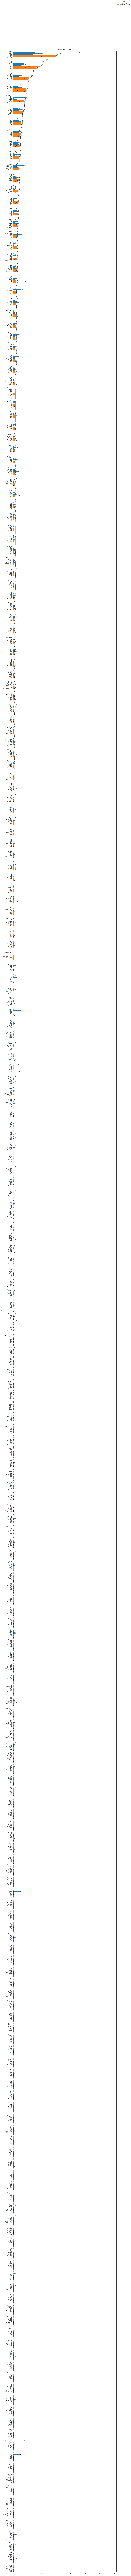

In [390]:
count_table_by_brand_and_category = pd.read_csv('brand_name_division_cnt.csv')

null_ind = list(np.where(count_table_by_brand_and_category.glowpick_brand.isnull())[0])

_count_table_by_brand_and_category = count_table_by_brand_and_category.copy()
_count_table_by_brand_and_category.loc[null_ind, 'glowpick_brand'] = list(count_table_by_brand_and_category.iloc[null_ind, :].brand_name)
_count_table_by_brand_and_category.tail(1)

cat_brd_df = _count_table_by_brand_and_category.loc[:, ['glowpick_brand', 'condition1']].copy()
cat_brd_df.columns = ['brand_name', 'category']
cat_brd_df['beauty_product_count'] = list(count_table_by_brand_and_category['0'])
cat_brd_df['glowpick_product_window_count'] = np.nan

cat_brd_df['glowpick_product_window_count'] = [int(x) for x in pd.read_csv('new_category_count_df.csv').fillna(0).glowpick_count]
cat_brd_df = cat_brd_df.rename( columns = {'glowpick_product_window_count':'glowpick_product_count'} )

_cat_brd_df = cat_brd_df[cat_brd_df.category == '스킨케어'].reset_index(drop=True).copy()
_cat_brd_df.loc[:, ['brand_name', 'beauty_product_count', 'glowpick_product_count']]
_cat_brd_df = _cat_brd_df.groupby(by=['brand_name']).sum()
_cat_brd_df['brand_name'] = list(_cat_brd_df.index)

_cat_brd_df = _cat_brd_df.sort_values('glowpick_product_count').reset_index(drop=True)
_cat_brd_df.index = _cat_brd_df.brand_name
ax = _cat_brd_df.plot(kind='barh', ylabel='brand_name', title='브랜드별 데이터 구축 현황', figsize=(20, 500))
ax.set(xlabel='Value')
for c in ax.containers:
    ax.bar_label(c, fmt='%.0f', label_type='edge')
    
ax.margins(x=0.1)
ax.legend(title='Columns', bbox_to_anchor=(1, 1.02), loc='upper left')
plt.savefig('image_count2')
plt.show()